In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [5]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

loan_status,0,1
person_age,,
20.0,15,2
21.0,894,395
22.0,3186,1050
23.0,4075,1179
24.0,4010,1128
25.0,3479,1028
26.0,2876,783
27.0,2432,663
28.0,2131,597


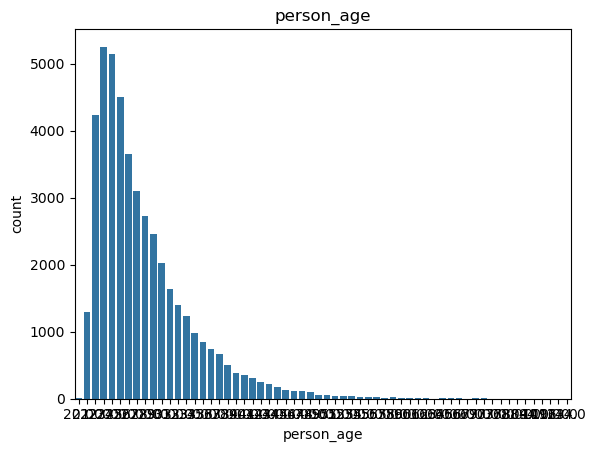

loan_status,0,1
person_gender,,
female,15674,4485
male,19326,5515


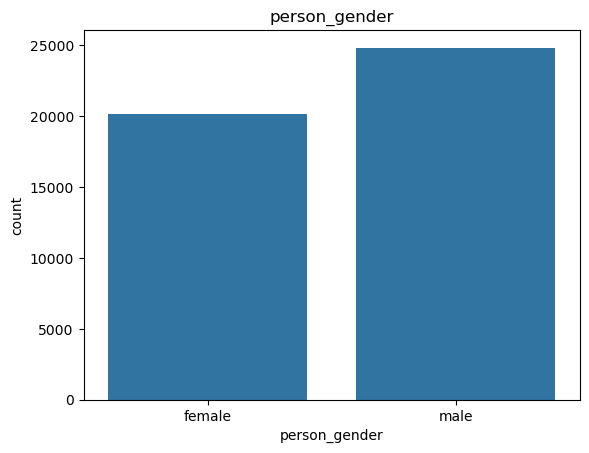

loan_status,0,1
person_education,,
Associate,9378,2650
Bachelor,10381,3018
Doctorate,479,142
High School,9301,2671
Master,5461,1519


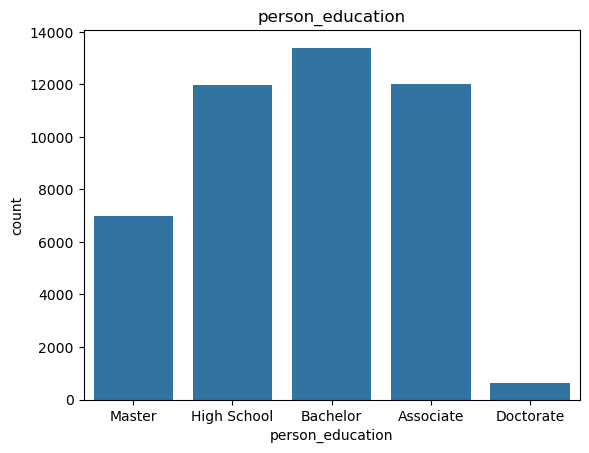

loan_status,0,1
person_home_ownership,,
MORTGAGE,16345,2144
OTHER,78,39
OWN,2729,222
RENT,15848,7595


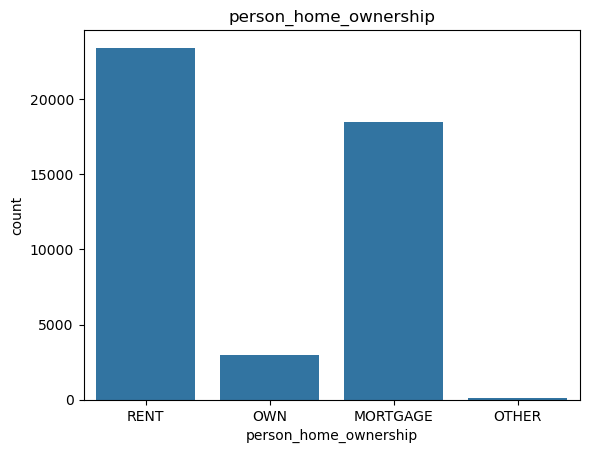

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,4982,2163
EDUCATION,7601,1552
HOMEIMPROVEMENT,3525,1258
MEDICAL,6170,2378
PERSONAL,6031,1521
VENTURE,6691,1128


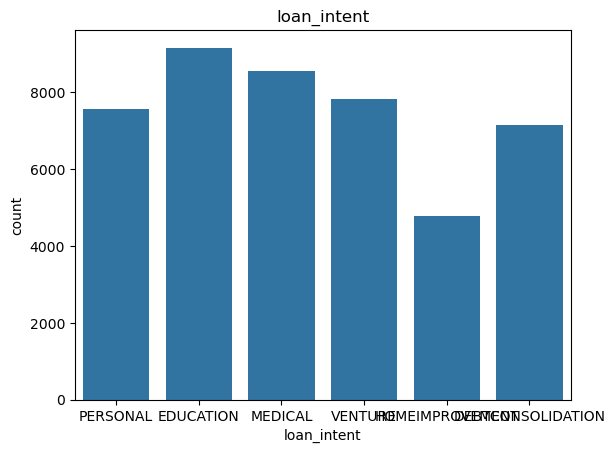

loan_status,0,1
previous_loan_defaults_on_file,,
No,12142,10000
Yes,22858,0


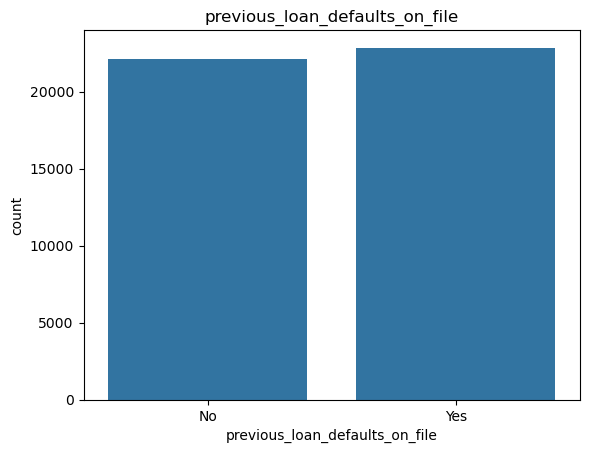

In [6]:
count_data = ['person_age', 'person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

for c in count_data:
    display(pd.crosstab(df[c], df['loan_status']))
    sns.countplot(x=c, data=df)
    plt.title(c)
    plt.show()

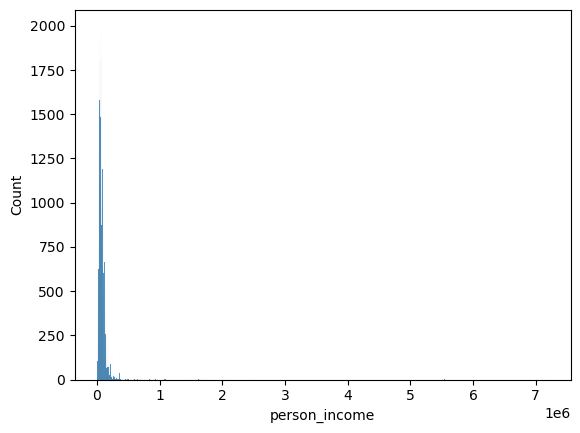

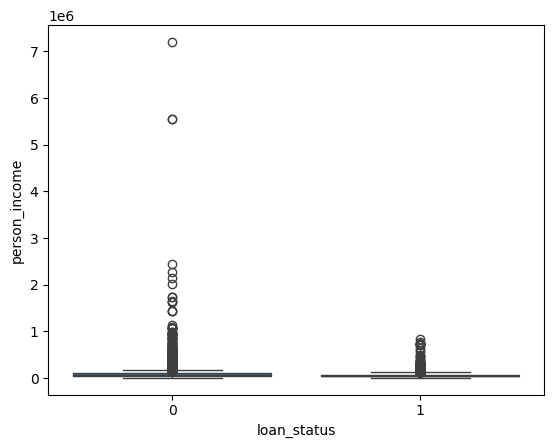

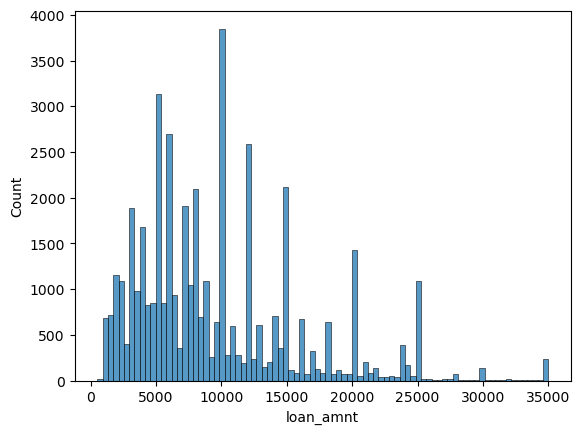

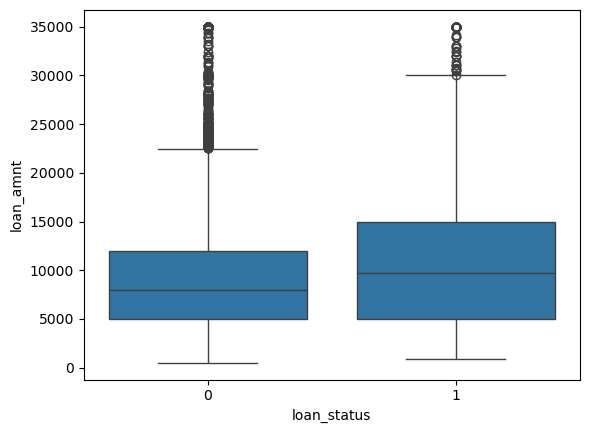

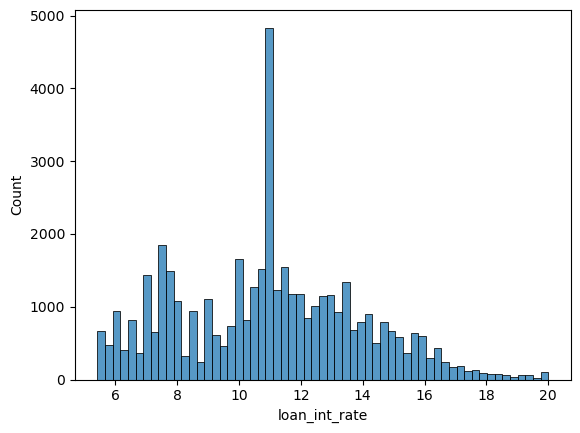

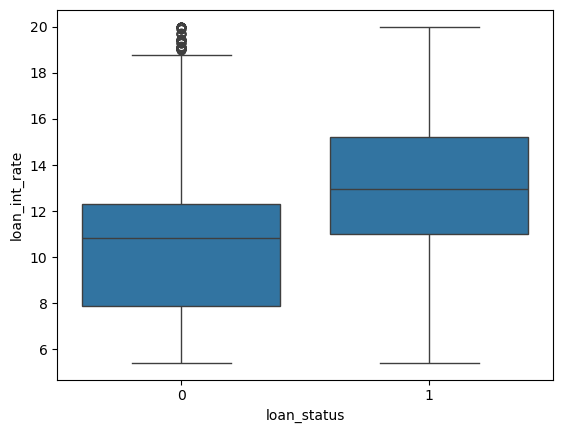

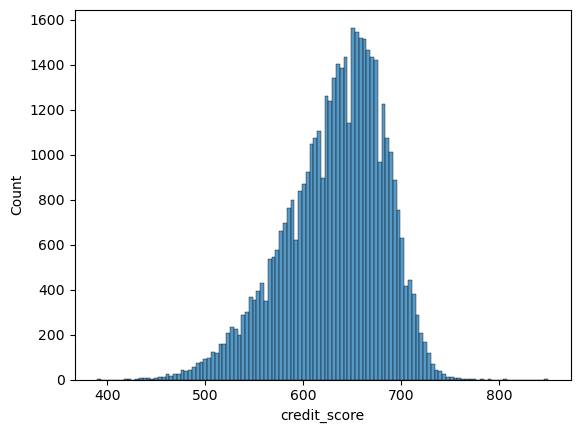

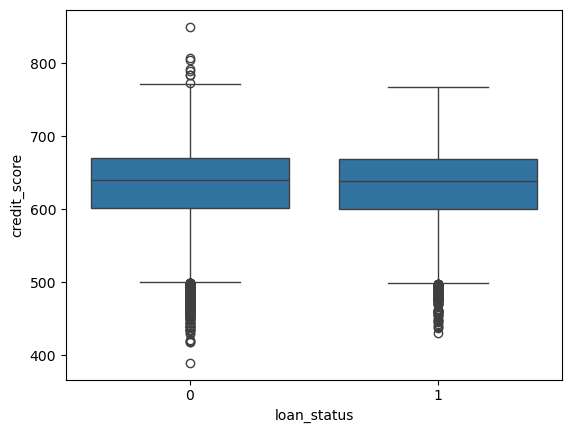

In [7]:
integer_data = ['person_income', 'loan_amnt', 'loan_int_rate', 'credit_score']

for i in integer_data:
    sns.histplot(x=i, data=df)
    plt.show()
    
    sns.boxplot(x='loan_status', y=i, data=df)
    plt.show()

In [8]:
gender_map = {'female':0, 'male':1}
df['person_gender'] = df['person_gender'].map(gender_map)
ed_map = {'High School':0, 'Associate':1, 'Bachelor':2, 'Master':3, 'Doctorate':4}
df['person_education'] = df['person_education'].map(ed_map)
default_map = {'Yes':0, 'No':1}
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map(default_map)

In [9]:
df = pd.get_dummies(df,columns=['person_home_ownership', 'loan_intent'],dtype=int)

In [10]:
def money_exchange(x):
    return x*110

df[['person_income', 'loan_amnt']] = df[['person_income', 'loan_amnt']].apply(money_exchange)

In [11]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [12]:
data = df
train, test = train_test_split(data)

In [13]:
drop_list = ['loan_status', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
X_train = train.drop(drop_list, axis=1)
y_train = train['loan_status']
X_test = test.drop(drop_list, axis=1)
y_test = test['loan_status']

In [14]:
X_train

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,previous_loan_defaults_on_file,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
21199,30.0,1,0,5366900.0,6,1650000.0,1,1,0,0,0,0,1,0,0,0,0
27268,31.0,0,3,17252070.0,8,1078000.0,1,1,0,0,0,0,0,0,1,0,0
15251,26.0,1,1,3249180.0,6,275000.0,0,0,0,1,0,0,0,0,1,0,0
8143,25.0,0,2,8332500.0,2,797500.0,1,0,0,0,1,0,0,1,0,0,0
1741,24.0,1,0,4342800.0,0,209000.0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33078,22.0,1,2,3402300.0,0,550000.0,1,0,0,1,0,0,0,0,0,0,1
18257,29.0,0,2,14616910.0,5,2640000.0,0,0,0,0,1,0,0,1,0,0,0
43215,25.0,1,0,7238880.0,4,825000.0,1,1,0,0,0,0,0,0,1,0,0
43501,31.0,1,2,4592720.0,5,660000.0,1,0,0,0,1,1,0,0,0,0,0


In [15]:
import lightgbm as lgb

params = {
    'n_estimators': 10,
    'max_depth'   : 10,
    'objective'   :'binary',
    'boosting'    :'gbdt',
    'metric'      :'accuracy', 
    'num_leaves'  : 10,
    'verbose'     : -1,
    'verbose_eval': False,
}

model = lgb.LGBMClassifier(boosting='gbdt',
                           max_depth=10, 
                           metric='binary_logloss', 
                           n_estimators=500, 
                           num_leaves=10, 
                           objective='binary', 
                           verbose=-1, 
                           verbose_eval=False)
model.fit(X_train, y_train)

LGBMClassifier(boosting='gbdt', max_depth=10, metric='binary_logloss',
               n_estimators=500, num_leaves=10, objective='binary', verbose=-1,
               verbose_eval=False)

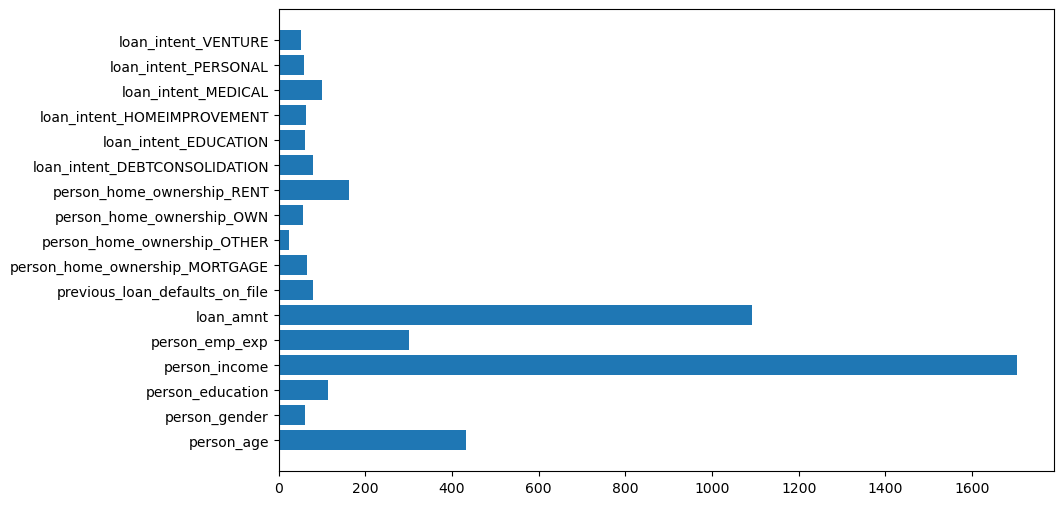

In [16]:
feat_labels = X_train.columns
importances = model.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(y=range(len(importances)),width=importances)
plt.yticks(ticks=range(len(feat_labels)),labels=feat_labels)
plt.show()

In [17]:
from sklearn.metrics import accuracy_score, f1_score

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
train_ac = accuracy_score(train_pred, y_train)
test_ac = accuracy_score(test_pred, y_test)

print(train_ac)
print(test_ac)

0.9247407407407408
0.9029333333333334


In [18]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [19]:
X_train

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,previous_loan_defaults_on_file,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
21199,30.0,1,0,5366900.0,6,1650000.0,1,1,0,0,0,0,1,0,0,0,0
27268,31.0,0,3,17252070.0,8,1078000.0,1,1,0,0,0,0,0,0,1,0,0
15251,26.0,1,1,3249180.0,6,275000.0,0,0,0,1,0,0,0,0,1,0,0
8143,25.0,0,2,8332500.0,2,797500.0,1,0,0,0,1,0,0,1,0,0,0
1741,24.0,1,0,4342800.0,0,209000.0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33078,22.0,1,2,3402300.0,0,550000.0,1,0,0,1,0,0,0,0,0,0,1
18257,29.0,0,2,14616910.0,5,2640000.0,0,0,0,0,1,0,0,1,0,0,0
43215,25.0,1,0,7238880.0,4,825000.0,1,1,0,0,0,0,0,0,1,0,0
43501,31.0,1,2,4592720.0,5,660000.0,1,0,0,0,1,1,0,0,0,0,0


In [20]:
z = np.zeros(4)
z[3] = 1

In [21]:
z

array([0., 0., 0., 1.])

In [22]:
gender_dict = {'男性':0, '女性':1}
post = '男性'

In [23]:
gender_dict[post]

0

In [24]:
home_ownership_dict = {'賃貸':0, '自己所有':1, 'ローン付き':2, 'その他':3}
post1 = '自己所有'
loan_intent_dict = {'債務返済':0, '教育':1, 'リフォーム':2, '医療':3, '私的':4, '事業':5}
post2 = '事業'

In [25]:
def one_hot(dicts, post):
    zero = np.zeros(len(dicts))
    zero[dicts[post]]=1
    return zero

In [26]:
test1 = one_hot(home_ownership_dict, post1)
test2 = one_hot(loan_intent_dict, post2)

In [27]:
tes = np.concatenate([test1,test2])

In [28]:
import pickle

In [29]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [30]:
file_path = 'finalized_model.sav'
loaded_model = pickle.load(open(file_path, 'rb'))

In [31]:
loaded_model.predict(np.array(X_test.iloc[0,:])[np.newaxis,:])[0]

0

In [32]:
np.array(X_test.iloc[0,:])[np.newaxis,:]

array([[2.600000e+01, 1.000000e+00, 2.000000e+00, 2.122494e+07,
        1.000000e+00, 2.015750e+06, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00]])

In [33]:
loan_status_dict = {0:'承認', 1:'不承認'}

In [35]:
def money_exchange(x):
    return x*10000

In [36]:
money_exchange(500)

5000000